In [126]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [127]:
pip install -U threadpoolctl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\C\anaconda3\python.exe -m pip install --upgrade pip' command.


In [128]:
!pip install -U yellowbrick

You should consider upgrading via the 'C:\Users\C\anaconda3\python.exe -m pip install --upgrade pip' command.


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [130]:
workbook = pd.ExcelFile('C:\\Users\C\Downloads\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls')
sheet1 = pd.read_excel(workbook, 1)
sheet2 = pd.read_excel(workbook, 2)
dataset = pd.concat([sheet1,sheet2], ignore_index=True)
dataset.drop(dataset.columns[[6,7,8]], inplace=True, axis=1)
dataset['UNS'] = dataset[' UNS'].replace(['very_low'],'Very Low', inplace=True)
dataset.drop(dataset.columns[[6]], inplace=True, axis=1)
dataset.columns = dataset.columns.str.replace(' UNS', 'UNS')
dataset

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


In [131]:
dataset.shape

(403, 6)

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [133]:
dataset.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

In [134]:
pd.set_option('display.max_colwidth', None)
c_l = dataset.columns.values.tolist()
column_list = pd.DataFrame({'Columns':c_l,'Full Column Name':['The degree of study time for goal object materails',
                                                             'The degree of repetition number of user for goal object materails',
                                                             'The degree of study time of user for related objects with goal object',
                                                             'The exam performance of user for related objects with goal object',
                                                             'The exam performance of user for goal objects',
                                                             'The knowledge level of user']})
column_list

,Columns,Full Column Name
0,STG,The degree of study time for goal object materails
1,SCG,The degree of repetition number of user for goal object materails
2,STR,The degree of study time of user for related objects with goal object
3,LPR,The exam performance of user for related objects with goal object
4,PEG,The exam performance of user for goal objects
5,UNS,The knowledge level of user


In [135]:
dataset.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


<AxesSubplot:xlabel='UNS', ylabel='count'>

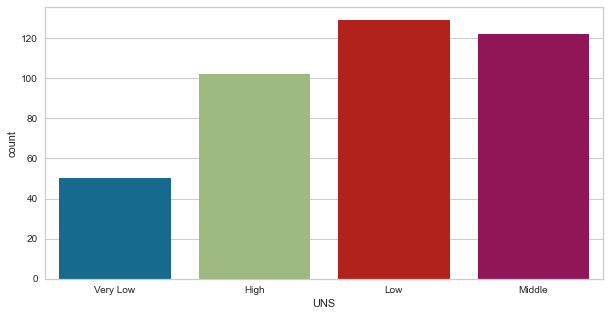

In [136]:
plt.figure(figsize = (10 , 5))
sns.countplot(data=dataset, x='UNS')

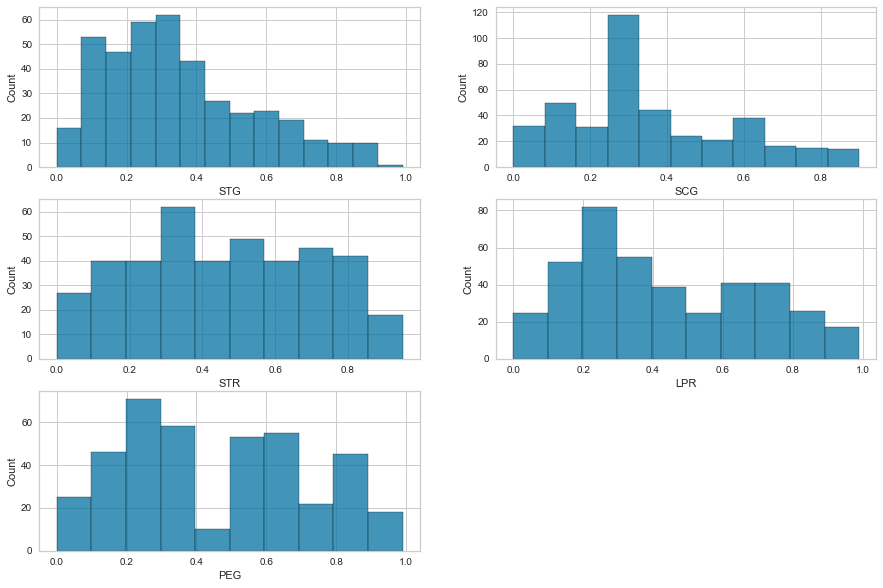

In [137]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=dataset, x=dataset.columns[i])
plt.show()

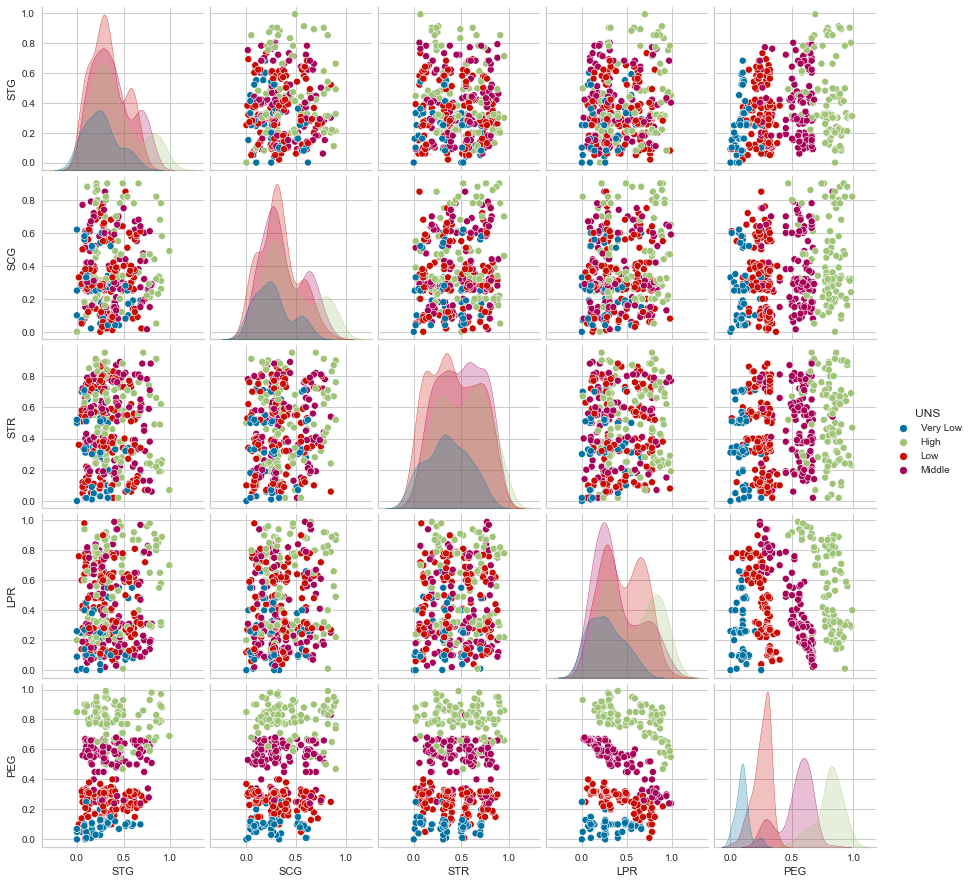

In [138]:
sns.pairplot(dataset, hue='UNS')

### Scaling the data

In [139]:
X = dataset.drop('UNS',axis=1)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

### Reducing the Dimensions

In [140]:
dim = PCA(n_components=2)
dimmed = dim.fit_transform(X)
dimensions = pd.DataFrame(dimmed, columns=['dim1','dim2'])
dimensions.head()

,dim1,dim2
0,3.726245,0.091266
1,1.019882,0.512718
2,2.393311,0.275547
3,1.664575,0.072429
4,1.607760,0.147666


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

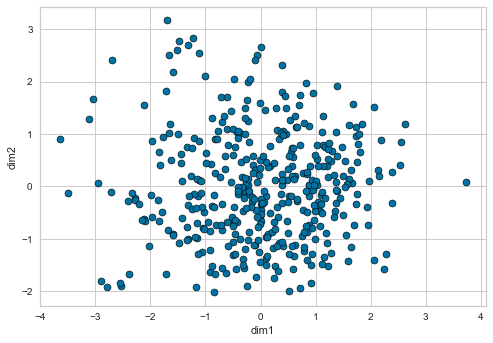

In [141]:
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, edgecolor='black')

### Plotting with different elbow metrics to find best k

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))>

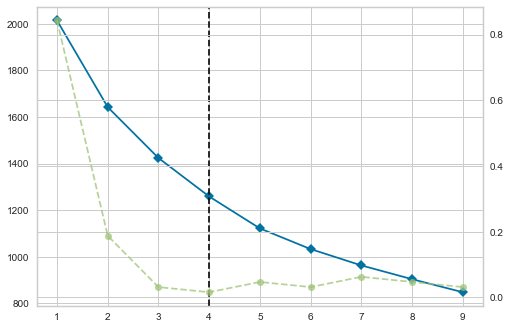

In [142]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)
visualizer.show

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(2, 10),
                 metric='silhouette')>

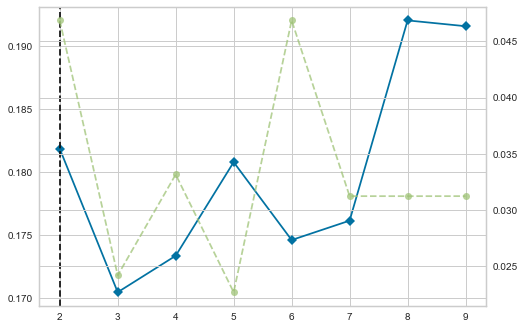

In [143]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(X)
visualizer.show

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(2, 10),
                 metric='calinski_harabasz')>

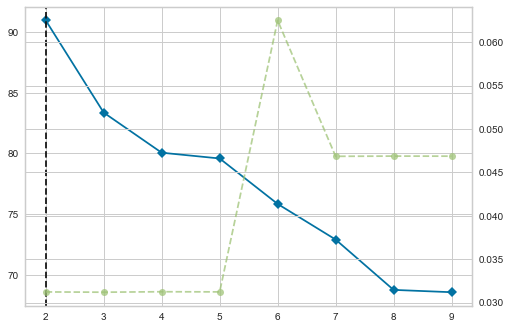

In [144]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show

### Plotting with different k

In [145]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters2 = kmeans.fit_predict(X)

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

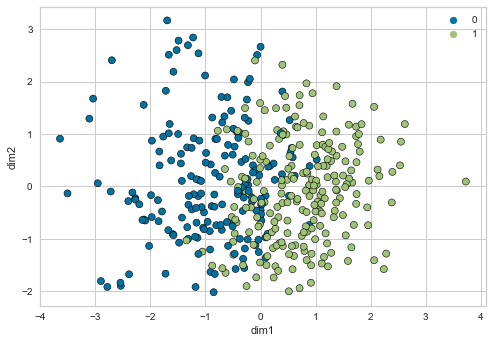

In [146]:
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters2, edgecolor='black')

In [147]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters4 = kmeans.fit_predict(X)

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

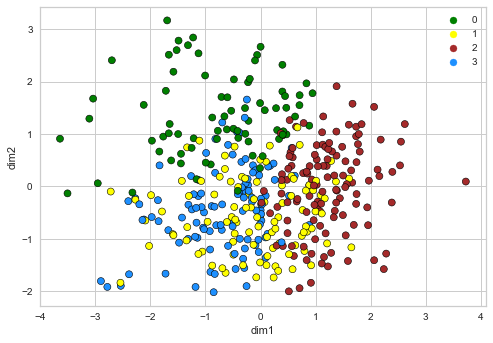

In [148]:
pal = ['green','yellow','brown','dodgerblue']
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters4, edgecolor='black',
               palette=pal)

### Comparing the scatterplots for the different k

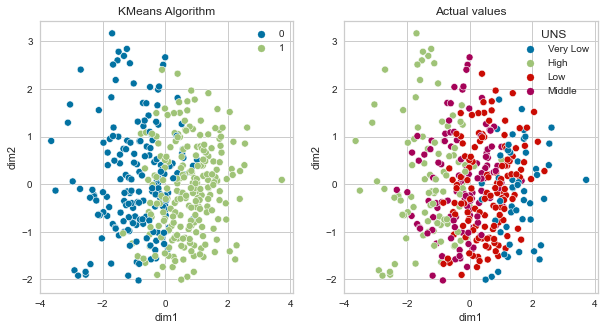

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters2)
plt.title('KMeans Algorithm')
plt.subplot(1,2,2)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=dataset.UNS)
plt.title('Actual values')
plt.show()

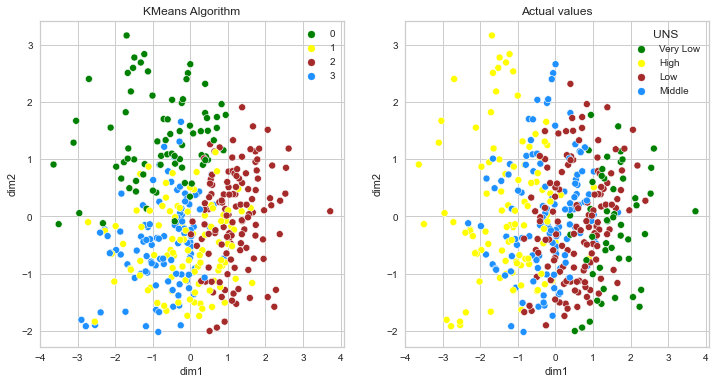

In [150]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters4, palette = pal)
plt.title('KMeans Algorithm')
plt.subplot(1,2,2)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=dataset.UNS, palette = pal)
plt.title('Actual values')
plt.show()

# Hierarchical Method

In [151]:
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters_H = hierarchical.fit_predict(X)

In [152]:
np.unique(clusters_H, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([160, 135,  60,  48], dtype=int64))

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

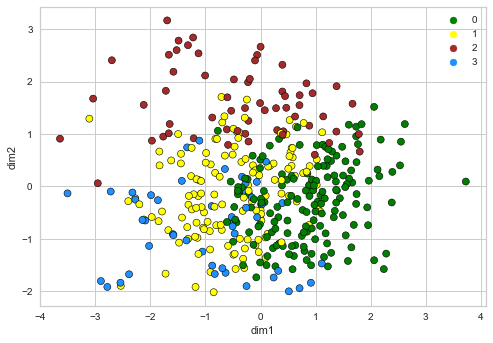

In [153]:
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters_H, edgecolor='black', palette = pal)

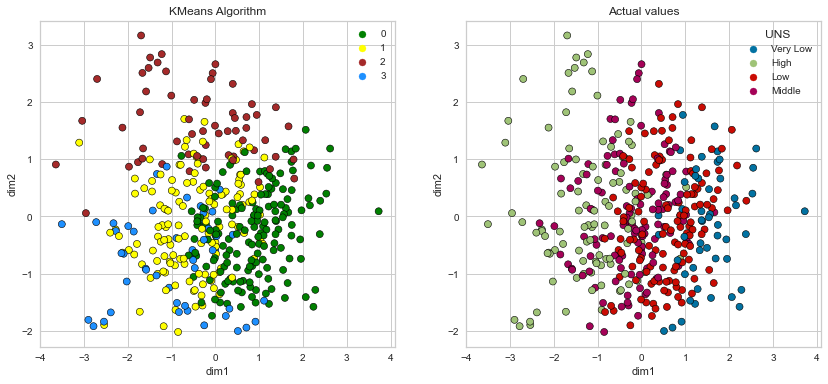

In [154]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=clusters_H, palette = pal, edgecolor='black')
plt.title('KMeans Algorithm')
plt.subplot(1,2,2)
sns.scatterplot(x=dimensions.dim1, y=dimensions.dim2, hue=dataset.UNS, edgecolor='black')
plt.title('Actual values')
plt.show()

### To compare performance of both models

In [155]:
k_means_score = []
perf_Kmeans = [metrics.silhouette_score(X, clusters4),
               metrics.homogeneity_score(dataset['UNS'].values, clusters4),
               metrics.completeness_score(dataset['UNS'].values, clusters4)]

hier_score = []
perf_Hier = [metrics.silhouette_score(X, clusters_H),
               metrics.homogeneity_score(dataset['UNS'].values, clusters_H),
               metrics.completeness_score(dataset['UNS'].values, clusters_H)]

for i in perf_Kmeans:
    k_means_score.append(i)
print(k_means_score)

for j in perf_Hier:
    hier_score.append(j)
print(hier_score)

performance_card = pd.DataFrame({'K-Means Score':k_means_score,'Hierarchical Score':hier_score},
                                index = ['Silhouette Score',
                                'Homogeneity Score',
                                'Completeness Score']
                               )
performance_card

[0.1737298696962304, 0.21261140080178317, 0.20655834636585865]
[0.14769849926934034, 0.2560082357261202, 0.26869402226377265]


,K-Means Score,Hierarchical Score
Silhouette Score,0.173730,0.147698
Homogeneity Score,0.212611,0.256008
Completeness Score,0.206558,0.268694
